# Universal Code

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

In [2]:
ohlcv = pd.read_csv('data/daily_TSLA.csv', parse_dates=['timestamp']).sort_values('timestamp').set_index('timestamp')

# Testing starts here

In [3]:
from backtest import *

In [18]:
ohlcv['2015-1']

,open,high,low,close,volume
timestamp,,,,,
2015-01-02,222.87,223.2500,213.2600,219.310,4764443
2015-01-05,214.55,216.5000,207.1626,210.090,5368477
2015-01-06,210.06,214.2000,204.2100,211.280,6261936
2015-01-07,213.35,214.7800,209.7800,210.950,2968390
2015-01-08,212.81,213.7999,210.0100,210.615,3442509
2015-01-09,208.92,209.9800,204.9600,206.660,4580722
2015-01-12,203.05,204.4700,199.2500,202.210,5950280
2015-01-13,203.32,207.6100,200.9110,204.250,4477320
2015-01-14,185.83,195.2000,185.0000,192.690,11551855


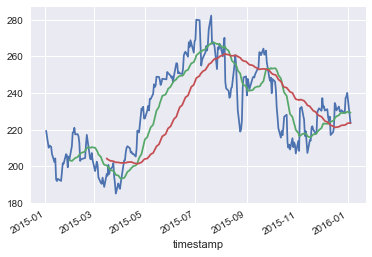

In [33]:
ohlcv.loc['2015-1-2':'2016-1-4']['close'].plot()
ohlcv.loc['2015-1-2':'2016-1-4']['close'].rolling(20).mean().plot()
ohlcv.loc['2015-1-2':'2016-1-4']['close'].rolling(50).mean().plot()

In [24]:
sma = Backtest(ohlcv, 50000, start='2015-1-2', end='2016-1-4', ini_shares=100, algo='moving_average')

In [32]:
sma.run_backtest(1000)

{'duration_analyzed': '367 days 00:00:00',
 'number_of_trades': 204,
 'simple_return': '-3490.324678019561 %',
 'remaining_cash': -5154025.0,
 'owned_shares': 12100,
 'portfolio_value': -2450764.0}

In [ ]:
rsi = Backtest(ohlcv, 100000, ini_shares=100, algo='rsi')

In [ ]:
rsi.run_backtest(10)